# Introduction to Data Analasys
## Final Project
##### Presenters:
Roi Maskalik, 212234637 <br>
Dvir Twito, 324270883

### Part 1: Choosing The Dataset

#### A
We chose the adult income dataset.

#### B
The dataset contains basic info about adults and a target class which is the adult's income.<br>
The dataset is intended for a supervised learning machine.

In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
project_df = pd.read_csv("adult.csv")

#### C
In this part, we used the dtypes attribute of the dataframe, in order to get a list of the features alongside their type.
<p>Note: every object type is a string.

In [154]:
print('The features of the dataset and their types:')
print(project_df.dtypes)

The features of the dataset and their types:
age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object


**We will remove the colummns: 'fnlwgt', 'education', 'capital-gain', 'capital-loss' and add a new column: 'binary_income'<br>
The details for our reasons will be provided on the pdf**

In [155]:
project_df = project_df.drop(['fnlwgt', 'education', 'capital-gain', 'capital-loss'], axis=1)

# Add a new column named 'binary_income' to the dataset
project_df['binary_income'] = project_df['income'].apply(lambda x: 1 if x == '>50K' else 0)

print('New features of the dataset and their types:')
print(project_df.dtypes)

New features of the dataset and their types:
age                 int64
workclass          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
hours-per-week      int64
native-country     object
income             object
binary_income       int64
dtype: object


#### D
In this part, we used the shape attribute of the dataframe, in order to get the number of records in the dataframe.

In [49]:
number_of_records = project_df.shape[0]
print(f"The number of records in the dataset is: {number_of_records}")

The number of records in the dataset is: 48842


### Part 2: Exploratory Data Analysis

#### A

##### Gender distribution

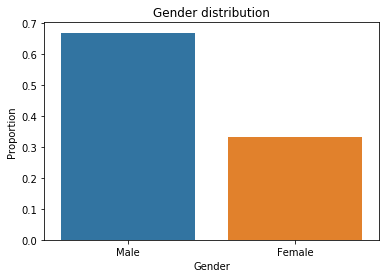

In [193]:
# Calculate the portion of each gender
gender_portion = project_df['gender'].value_counts(True)
gender_df = pd.DataFrame({'Gender': gender_portion.keys(), 'Proportion': gender_portion.values})

# Visualize the distribution
gender_plot = sns.barplot(data=gender_df, x='Gender', y='Proportion')

# Set the title
gender_plot.set(title='Gender distribution')

# Clear the output and show the plot
plt.show()

##### Race distribution
We presented the race distribution in a logarithmic Y scale, because that the 'Other' and the 'Amer-Indian-Escimo' are a very small portion in the dataset, and without it we almost couldn't see them.

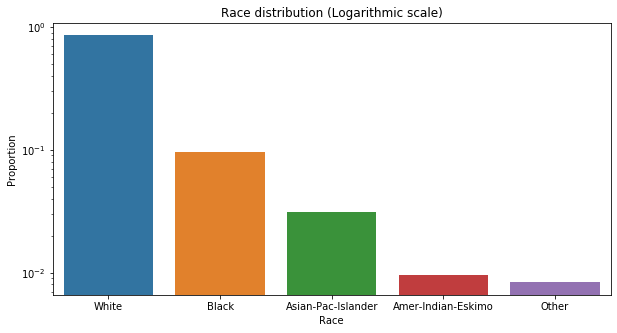

In [209]:
# Calculate the portion of each race
race_portion = project_df['race'].value_counts(True)
race_df = pd.DataFrame({'Race': race_portion.keys(), 'Proportion': race_portion.values})

# Visualize the distribution
race_plot = sns.barplot(data=race_df, x='Race', y='Proportion')

# Set the title and the size
race_plot.set(title='Race distribution (Logarithmic scale)')
race_plot.figure.set_size_inches(10, 5)

# Turn to logarithmic scale
race_plot.set_yscale('log')

# Clear the output and show the plot
plt.show()

##### Age distribution

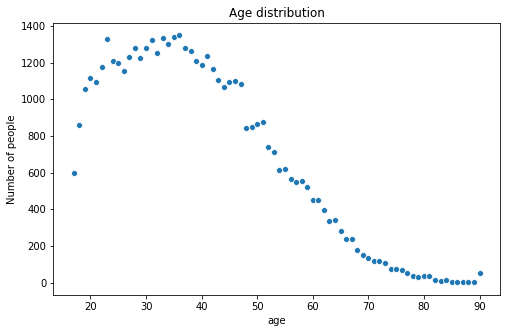

In [221]:
# Gropu the data by age
df_gb_age = project_df.groupby('age', as_index=False)
age_sizes = df_gb_age.size()

# Visualize the results
age_plot = sns.scatterplot(age_sizes.index, age_sizes)

# Set the title and the Y axis label
age_plot.set(ylabel='Number of people', title='Age distribution')

# Set the size of the plot
age_plot.figure.set_size_inches(8, 5)

# Clear the output and show the plot
plt.show()

##### Income distribution

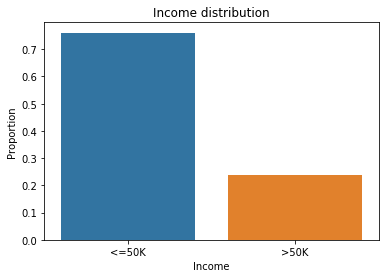

In [217]:
# Calculate the portion of each income
income_portion = project_df['income'].value_counts(True)
income_df = pd.DataFrame({'Income': income_portion.keys(), 'Proportion': income_portion.values})

# Visualize the distribution
income_plot = sns.barplot(data=income_df, x='Income', y='Proportion')

# Set the title
income_plot.set(title='Income distribution')

# Clear the output and show the plot
plt.show()

##### Educational years distribution
We presented the educational years distribution in a logarithmic Y scale, there are many small values, but also many big numbers.

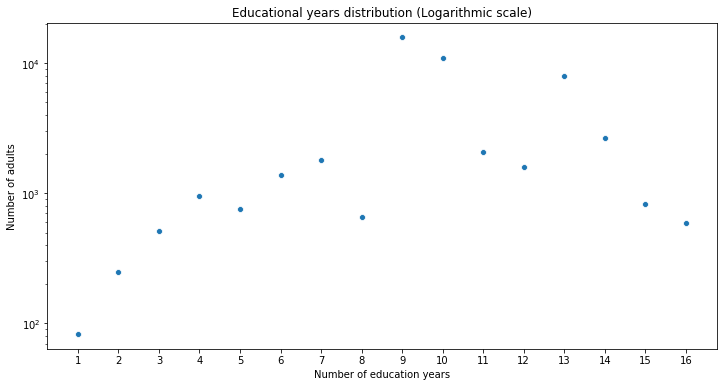

In [222]:
# Group our dataframe by number of education years and calculate the number of adults in each number
education_groupby = project_df.groupby('educational-num', as_index = False)
education_groupby_df = education_groupby.size().reset_index()

# Set the minimum and maximum for the xticks
min_years_of_education = education_groupby_df['educational-num'].min()
max_years_of_education = education_groupby_df['educational-num'].max()

# Visualize the results and set labels, title, ticks and size 
education_years_count_plot = sns.scatterplot(data = education_groupby_df, x = 'educational-num', y = 0)

# Set the title, the axes lables and set the x ticks
education_years_count_plot.set_title("Educational years distribution (Logarithmic scale)")
education_years_count_plot.set(ylabel = 'Number of adults', xlabel = "Number of education years")
plt.xticks(np.arange(min_years_of_education, max_years_of_education + 1))

# Set the size of the plot
education_years_count_plot.figure.set_size_inches(12,6)

# Turn to logarithmic scale
education_years_count_plot.set_yscale('log')

# Clear the output and show the plot
plt.show()

#### B

##### Number of education years and income correlation

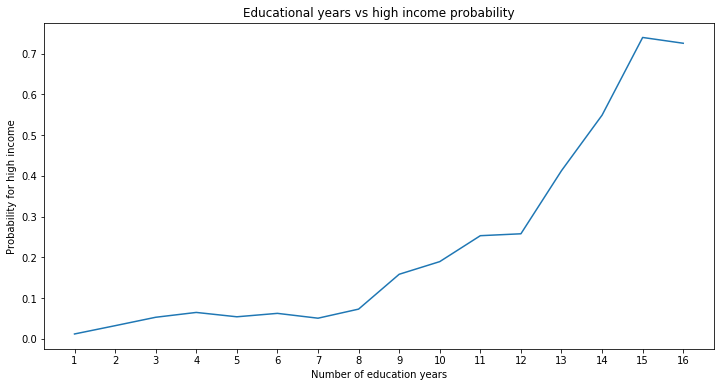

In [157]:
# Calculate the probability to have an income higher than 50K for each number of education years
years_education_vs_income_df = education_groupby.agg({'binary_income': 'mean'})

# Visualize the results
years_education_vs_income_plot = sns.lineplot(data = years_education_vs_income_df, x = 'educational-num', y = 'binary_income')

# Set the title, the axes lables and set the x ticks
years_education_vs_income_plot.set_title("Educational years vs high income probability")
years_education_vs_income_plot.set(ylabel = 'Probability for high income', xlabel = "Number of education years")
plt.xticks(np.arange(min_years_of_education, max_years_of_education + 1))

# Set the size of the plot
years_education_vs_income_plot.figure.set_size_inches(12,6)

# Clear the output and show the plot
plt.show()

##### Educational years and work hours correlation

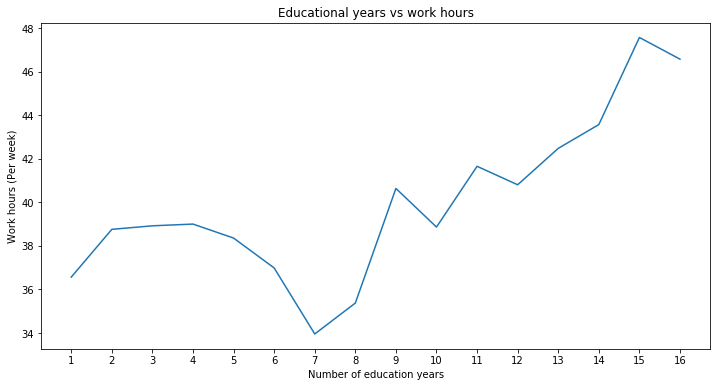

In [160]:
# Calculate the average number of work hours for each number of education years
years_education_vs_work_hours_df = education_groupby.agg({'hours-per-week': 'mean'})

# Visualize the results
years_education_vs_work_hours_plot = sns.lineplot(data = years_education_vs_work_hours_df, x = 'educational-num', y = 'hours-per-week')

# Set the title, the axes lables and set the x ticks
years_education_vs_work_hours_plot.set_title("Educational years vs work hours")
years_education_vs_work_hours_plot.set(ylabel = 'Work hours (Per week)', xlabel = "Number of education years")
plt.xticks(np.arange(min_years_of_education, max_years_of_education + 1))

# Set the size of the plot
years_education_vs_work_hours_plot.figure.set_size_inches(12,6)

# Clear the output and show the plot
plt.show()

In [92]:
# Present the correlation between the variables
years_education_work_hours_correlation = (years_education_vs_work_hours_df['hours-per-week'].
    corr(years_education_vs_work_hours_df['educational-num'], method = 'spearman'))
print(f"The spearman correlation between years of education and work hours per week is: {years_education_work_hours_correlation}")

The spearman correlation between years of education and work hours per week is: 0.7647058823529411


We can see that there is a relatively strong positive correlation between years of education and work hours per week, atarting from 7 years of educaion.

##### Age and work hours correlation

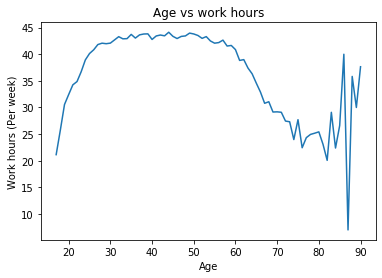

In [159]:
# Calculate the average number of work hours for each age
age_vs_work_hours_df = df_gb_age.agg({'hours-per-week': 'mean'})

# Visualize the results
age_vs_work_hours_plot = sns.lineplot(data = age_vs_work_hours_df, x='age', y='hours-per-week')

# Set the title, the axes lables and set the 
age_vs_work_hours_plot.set_title("Age vs work hours")
age_vs_work_hours_plot.set(ylabel='Work hours (Per week)', xlabel="Age")

# Set the size of the plot
years_education_vs_work_hours_plot.figure.set_size_inches(12,6)

# Clear the output and show the plot
plt.show()

In [94]:
# Present the correlation between the variables
age_work_hours_correlation = (age_vs_work_hours_df['hours-per-week'].
    corr(age_vs_work_hours_df['age'], method = 'spearman'))
print(f"The spearman correlation between age and work hours per week is: {age_work_hours_correlation}")

The spearman correlation between age and work hours per week is: -0.5009848204368752


We can see that there is a corelation between the age and the number of work hours just in a specific ages range: 20-30 (positive) and 60-80 (negative), but overall there is no corralation.

### Part 3: Estimation And Hypothesis Testing

In [231]:
# Explore the data in order to form a question for the hypothesis testing
num_of_females = project_df[project_df['gender'] == 'Female'].shape[0]
num_of_males = project_df[project_df['gender'] == 'Male'].shape[0]

female_with_income_above_50k_filter = (project_df['gender'] == 'Female') & (project_df['income'] == '>50K')
male_with_income_above_50k_filter = (project_df['gender'] == 'Male') & (project_df['income'] == '>50K')


percentage_income_above_50k_from_females = (project_df[female_with_income_above_50k_filter].shape[0] / num_of_females) * 100
percentage_income_above_50k_from_males = (project_df[male_with_income_above_50k_filter].shape[0] / num_of_males) * 100

print(f" The percentage of adults in our dataset that have an income higher than 50k from within the males: {percentage_income_above_50k_from_males}%\n",
      f"The percentage of adults in our dataset that have an income higher than 50k from within the females: {percentage_income_above_50k_from_females}%\n",
      f"The percentage of males in our dataset: {(num_of_males / number_of_records) * 100}%\n",
      f"The percentage of females in our dataset: {(num_of_females / number_of_records) * 100}%")

 The percentage of adults in our dataset that have an income higher than 50k from within the males: 30.37672281776417%
 The percentage of adults in our dataset that have an income higher than 50k from within the females: 10.925148221343873%
 The percentage of males in our dataset: 66.84820441423365%
 The percentage of females in our dataset: 33.151795585766344%


#### A

We would expect to have around the same percantage for both genders.<br>
The issue begs the question: **Is there a discrimination against female adults?**

The question is interesting for us because in the past years, a lot of effort was made in order to correct the inequality of the genders
    
We will use the bootstrap method on our dataset to estimate the difference in the percentage of females that have an income higher than 50k and the percentage of males that have an income higher than 50k, with confidence of 95%.
    

In order to make the calculations easier we will the column **binary_income**, <br>
that contains 1 if the respective income is '>50k' and 0 if it's '<=50k'<br>
The mean of the column **binary_income** will be the probability to choose an adult with an income higher than 50k from our dataset.

#### B

**Null hypothesis -** The percentage of females who have an income higher than 50k and the percentage of males who have an income higher than 50k are equal<br>
**Alternative hypothesis-**  The percentage of females who have an income higher than 50k and the percentage of males who have an income higher than 50k are different.<br>
**Test statistic-**  The difference between the precantage of females who have an income higher than 50k and the precentage of males who have an income higher than 50k. 

#### C

In [23]:
def differences_in_means(sample, column_name, grouping_var):
    '''
    Calculates the difference in the means of binary outcomes between males and females
    '''
    group_by_variable = sample.groupby(grouping_var)
    amount = group_by_variable[column_name].mean()
    return amount[1] - amount[0]

In [24]:
def bootstrap_difference_in_incomes(original_sample, column_name, grouping_var, num_replications):
    original_sample_size = original_sample.shape[0]
    bootstrap_difference_means = np.empty(num_replications)
    for i in range(num_replications):
        bootstrap_sample = original_sample.sample(original_sample_size, replace=True)
        bootstrap_difference_means[i] = differences_in_means(bootstrap_sample, column_name, grouping_var)
    return bootstrap_difference_means

In [25]:
# Perform bootstrap
num_simulations = 10000
bootstrap_difference_means = bootstrap_difference_in_incomes(project_df, 'binary_income', 'gender', num_simulations)

lower value: 0.1875033673622316
upper value: 0.20152857165783117


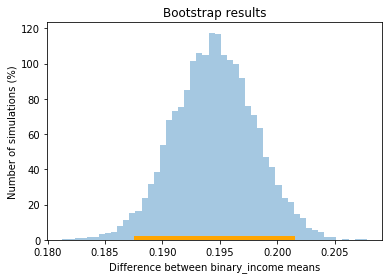

In [229]:
# Visualize the results
difference_incomes_between_genders_plot = sns.distplot(bootstrap_difference_means, kde=False, norm_hist=True)

# Set the title and the axes lables
difference_incomes_between_genders_plot.set(xlabel='Difference between binary_income means', ylabel= 'Number of simulations (%)',
                                           title='Bootstrap results')

# Calculate the bounds of the interval, print them, and add the interval to the plot
left_end = np.percentile(bootstrap_difference_means, 2.5, interpolation='higher')
right_end =  np.percentile(bootstrap_difference_means, 97.5, interpolation='higher')
plt.hlines(y=0, xmin=left_end, xmax=right_end, colors='orange', linestyles='solid', lw=8)  
print(f"lower value: {left_end}")
print(f"upper value: {right_end}")


# Clear the output and show the plot
plt.show()

Zero is not included in the 95% CI for the difference between the means.
    
Therefore we reject the null hypothesis and conclude at the 95% confidence level that the there is a difference between the precantage of females that have an income higher than 50k and the precentage of males that have a income higher than 50k: <br>

In [226]:
print(f'The interval lies between {left_end * 100} and {right_end * 100} in favor of the males')

The interval lies between 18.75033673622316 and 20.152857165783118 in favor of the males


### Part 4: Prediction - Classification

#### A
We want to classify adults with income higher than 50K.

#### B
The target variable is 'binary_income'.

We started by cleaning the data. We removed the rows which contains '?', beacause this is a corrupted data, that interrupt us in the classification process.<p>
After that, we encoded the categorial attributes, in order to use them in the classification process.

In [115]:
# Cleaning the data
clean_df = project_df[(project_df.astype(str) != '?').all(axis=1)]  # Remove rows with ?
encoded_df = clean_df.copy()

# Perform encoding
variables_to_encode = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']
for var in variables_to_encode:
    encoded_df[var] = encoded_df[var].astype('category').cat.codes

# Remove income from encoded_df (in order to perfome cross validation)
encoded_df = encoded_df.drop(['income'], axis=1)
encoded_df.head()

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,binary_income
0,25,2,7,4,6,3,2,1,40,38,0
1,38,2,9,2,4,0,4,1,50,38,0
2,28,1,12,2,10,0,4,1,40,38,1
3,44,2,10,2,6,0,2,1,40,38,1
5,34,2,6,4,7,1,4,1,30,38,0


In [117]:
from sklearn import preprocessing

encoded_df_columns = encoded_df.columns
scaler = preprocessing.MinMaxScaler()
scaled_np_matrix = scaler.fit_transform(encoded_df)
scaled_encoded_df = pd.DataFrame(scaled_np_matrix, columns=encoded_df_columns)
scaled_encoded_df.head()

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,binary_income
0,0.109589,0.333333,0.400000,0.666667,0.461538,0.6,0.5,1.0,0.397959,0.95,0.0
1,0.287671,0.333333,0.533333,0.333333,0.307692,0.0,1.0,1.0,0.500000,0.95,0.0
2,0.150685,0.166667,0.733333,0.333333,0.769231,0.0,1.0,1.0,0.397959,0.95,1.0
3,0.369863,0.333333,0.600000,0.333333,0.461538,0.0,0.5,1.0,0.397959,0.95,1.0
4,0.232877,0.333333,0.333333,0.666667,0.538462,0.2,1.0,1.0,0.295918,0.95,0.0


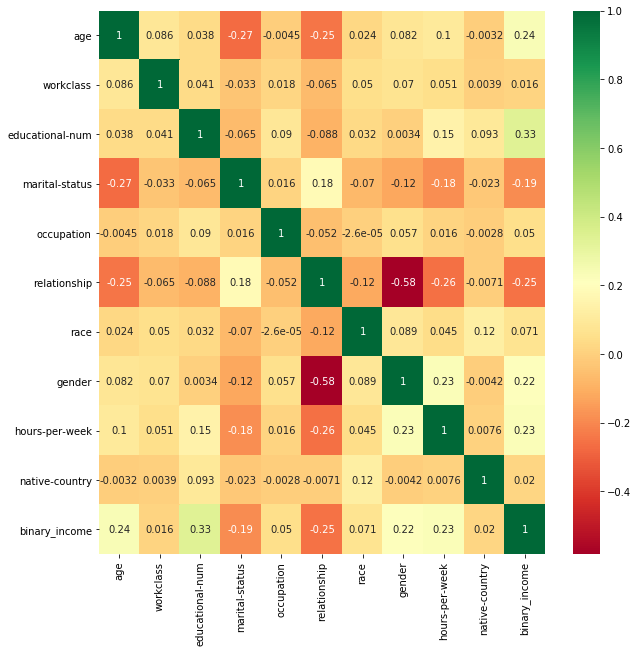

In [118]:
# Compute correlation between each pair of variables in data frame
correlations = scaled_encoded_df.corr()

# Plot heat map
plt.figure(figsize=(10,10))
sns.heatmap(correlations,annot=True,cmap="RdYlGn")

#### A

We can see that none of the attributes has a strong correlation with binary_income, and that none of them has a strong correlation with one another, so we won't choose specific attributes for the classification process, and take all of them.

#### C

In [233]:
# Split fata for train and test

from sklearn.model_selection import train_test_split

X = scaled_encoded_df.iloc[:,:-1].values
Y = scaled_encoded_df.iloc[:, -1].values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, shuffle=False)
print(f'X_train set size:  {X_train.shape}')
print(f'X_test set size: {X_test.shape}')
print(f'Y_train set size: {Y_train.shape}')
print(f'Y_test set size: {Y_test.shape}')

X_train set size:  (36177, 10)
X_test set size: (9045, 10)
Y_train set size: (36177,)
Y_test set size: (9045,)


In [87]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

def multiple_cross_validations(num_of_k, num_groups_of_cross_validation, features, target):
    """
    Runs mulitple cross validations on different K numbers, calculates the  mean of the scores for each
    cross validation, and returns an array of the means.
    """
    cross_validation_means = np.empty(num_of_k)
    for k in np.arange(num_of_k):
        classifier = KNeighborsClassifier(n_neighbors=k + 1)
        cross_validation_scores = cross_val_score(classifier, features, target, cv=num_groups_of_cross_validation)
        cross_validation_means[k] = np.mean(cross_validation_scores)
    return cross_validation_means

In [120]:
# Create a dataframe that contains our data
min_k = 1
max_k = 20
number_of_folds = 5
k_list = list(range(min_k,max_k + 1))
cross_validation_means = list(multiple_cross_validations(max_k, number_of_folds, X_train, Y_train))
knn_mean_df = pd.DataFrame({'k' : k_list, 'cv_score_avg' : cross_validation_means})
knn_mean_df

,k,cv_score_avg
0,1,0.776460
1,2,0.796279
2,3,0.800702
3,4,0.809520
4,5,0.810487
5,6,0.815933
6,7,0.816458
7,8,0.820991
8,9,0.820743
9,10,0.822290


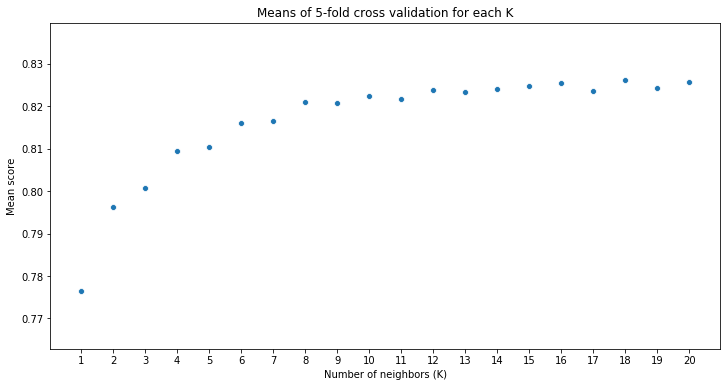

In [126]:
# Visualize the results for each K

# Set the size of the plot
plt.figure(figsize=(12,6))

# Create the scatter plot
cross_validation_means_plot = sns.scatterplot(data=knn_mean_df, x='k', y='cv_score_avg')

# Set the labels of the axes
cross_validation_means_plot.set(xlabel='Number of neighbors (K)', ylabel='Mean score')

# Set the title
cross_validation_means_plot.set_title('Means of 5-fold cross validation for each K')

# Set the X axis ticks
plt.xticks(np.arange(min_k, max_k + 1))

# Clear the output and show the plot
plt.show()

In [125]:
max_average_score = knn_mean_df['cv_score_avg'].max()
optimal_k = int(knn_mean_df[knn_mean_df['cv_score_avg'] == max_average_score].iloc[0]['k'])
print(f'The optimal K for the model is {optimal_k}') 

The optimal K for the model is 18


###### Evaluating the accuracy of the optimal K
Now we will evaluate the accuracy of the optimal k, using its score and F1 score, and take a look at the confusion matrix

In [128]:
# Score
optimal_classifier = KNeighborsClassifier(n_neighbors=optimal_k)
optimal_classifier.fit(X_train, Y_train)
accuracy = optimal_classifier.score(X_test, Y_test)
print(f'The accuracy of the optimal k is {accuracy}')

The accuracy of the optimal k is 83.10668877833058%


In [151]:
# F1 score
from sklearn.metrics import f1_score
f1 = f1_score(Y_test, Y_pred)
print(f'The F1 score of the optimal k is {f1}')

The F1 score of the optimal k is 0.6298449612403101


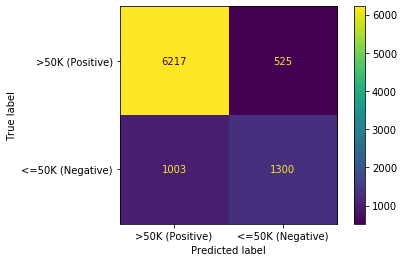

In [150]:
# Confusion matrix

from sklearn.metrics import plot_confusion_matrix

class_names = ['>50K (Positive)', '<=50K (Negative)']
plot_confusion_matrix(optimal_classifier, X_test, Y_test, display_labels=class_names, values_format='')

# Clear the output and show the matrix
plt.show()

As we can see that overall, our model is good. 